# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [4]:
import math
import sys

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [6]:
# YOUR CODE HERE
wine_data = pd.read_csv("white_wine.csv", sep=";")
wine_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4363,7.1,0.310,0.25,11.20,0.048,32.0,136.0,0.99663,3.14,0.40,9.5,5
3077,6.2,0.250,0.38,7.90,0.045,54.0,208.0,0.99572,3.17,0.46,9.1,5
1580,9.8,0.310,0.49,15.40,0.046,13.0,119.0,1.00040,3.18,0.45,9.5,5
2273,6.1,0.460,0.32,6.20,0.053,10.0,94.0,0.99537,3.35,0.47,10.1,5
2309,8.1,0.280,0.34,1.30,0.035,11.0,126.0,0.99232,3.14,0.50,9.8,6
3958,5.6,0.185,0.19,7.10,0.048,36.0,110.0,0.99438,3.26,0.41,9.5,6
790,7.7,0.340,0.28,11.00,0.040,31.0,117.0,0.99815,3.27,0.29,9.2,6
3015,7.2,0.320,0.30,8.25,0.020,14.0,104.0,0.99362,2.99,0.44,11.4,6
1384,6.8,0.230,0.40,1.60,0.047,5.0,133.0,0.99300,3.23,0.70,11.4,6
3206,6.6,0.290,0.39,6.75,0.031,22.0,98.0,0.99130,3.15,0.80,12.9,7


In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
sorted(wine_data["quality"].unique())

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [10]:
# YOUR CODE HERE
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Explantion of Columns

**Fixed Acidity** : Non-volatile acids that are naturally present in white wine and do NOT evaporate easily hince the name "fixed acidity". Examples of these acids include tartaric and malic acid. Measured in grams per liter (g/L) with a typical range from 4.5 to 8.5 g/L. White wines are typically on the higher end of the scale. Important for tasting notes since wines with a higher fixed acidity are more tart. 

**Volatile Acidity**: volatile acidity (VA) in small amouts is natural in the wine making process; however, if the wine is exposed to excessive amounts of oxygen then VA amounts will increase. For white wines the max amount of VA legally allowed is 1.2 grams per liter (g/L). Typical white wines have a value of 0.40 g/L. Very important to measure the quality of wine, high level of VA can lead to the wine smelling like vinegar or nail polish.

**Citric Acid**: Measured in grams per liter (g/L) with a typical range of 0.04 - 0.7 g/L. Added to bring a fresh and crip feeling to white wine. To much citric acid can cause negative impacts by creating a environment for microbial growth. 

**Residual Sugar**: Measured in grams per liter (g/L), with a range from 1 g/L to greater than 45 g/L. Less residual sugar means a more dry wine while the oppsite is an increase in sweetness of the wine. Most white wines are going to fall in the range of 1 - 11 g/L. Residual sugars occur due to the natural process of fermentation. Contribuetes to the sweetness of the wine. 

**Chlorides**: The amount of NaCl or salt found in the wine. To much salt is undesierable because it can lead to an unplesant taste. Measured in grams per liter (g/L), with if typical range in white wine varying greatly from 0.06 g/L to 0.35 g/L. Most white wines will be around 0.04 g/L.

**Free Sulfur Dioxide**: Naturally occuring and added during the wine making process. Used to prevent oxidation in white wines. Measured in milligrams per liter (mg/L) with a typical range of anywhere from 0 - 50 mg/L in white wines. This column is directly correlated to pH. As pH rises or falls so does the content of free sulfur dioxides. 

**Total Sulfur Dioxide**: The total of both "free" and "bound" sulfur dioxide. Bound sulfur dioxide is no longer avaliable to prevent oxidation. Hight amounts of "bound" sulfur dioxides can indicate spoliage. Measured in milligrams per liter (mg/L), with a typical range of 100-200 mg/L. The United States legal limit is 350 mg/L.

**Density**: Measured in grams per milliliter (g/mL), and ranges from 0.991 to 1.014 g/mL in white wine. Provides information about alcohol content (correlated to "Alcohol" column?) and residual sugar levels (correlated to "residual sugar" column?). For tasting notes density is related to how the wine feels in the tasters mouth. 

**pH**: Range of pH for white wine is typically 3.0 - 3.4. High acidity is needed to prevent the growth of microbes. pH gives white wine the crisp and fresh flavor. pH seems to be linked to several other columns in the data set further exploration will be conducted. 

**Sulphates**: Used as a perservative in the wine making process. They are naturally occuring and typically added during the wine making process. High amounts of sulphates are linked to a bitter taste in wine. The typical range is 0.05 g/l - 0.350 g/L. 

**Alcohol**: Percentage of alcohol in the white wine. Alcohol percentage contributes to the taste of the wine. The typical alcohol percentage in white wine is 8% - 14.5%. (Could be interesting to look at correlations between residual sugar and alcohol content).

**Quality (target)**:

YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

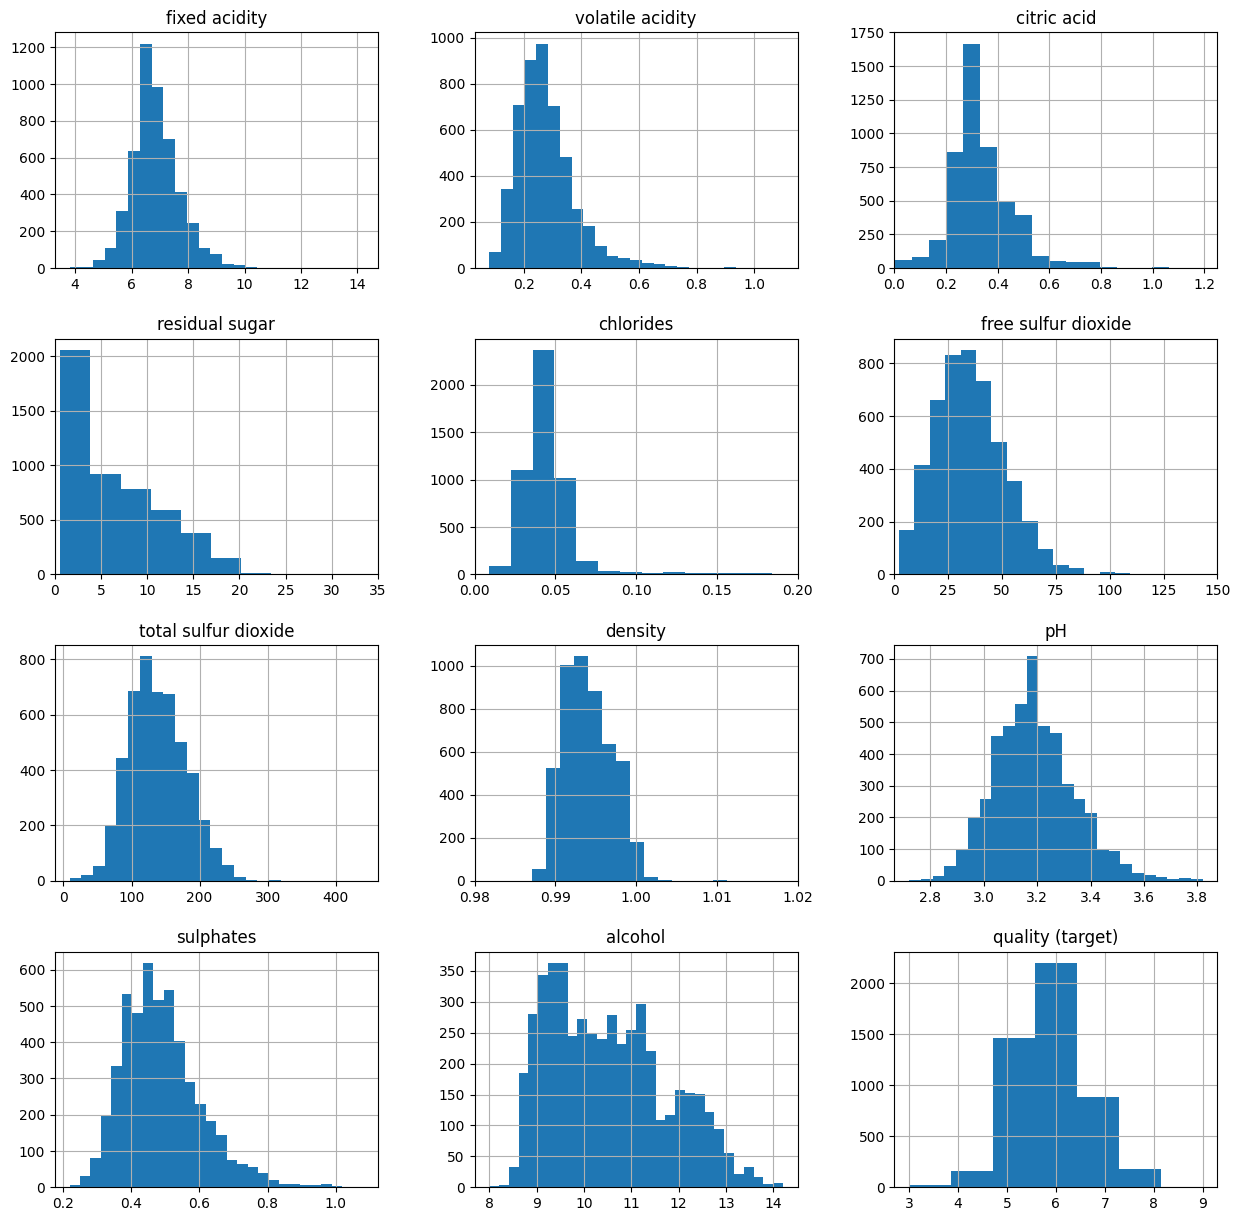

In [11]:
# YOUR CODE HERE
# ***TO-DO***
    # Add xaxis labels!!!



#generating all base hist plots for all cols
axes = wine_data.hist(figsize=(15,15), bins=25)

# changing properties about citric acid plot for more clarity
ax_ca = axes[0, 2]
ax_ca.set_xlim(0.0, 1.25)

# changing properties about residual sugar plot for a more clean figure
ax_rs = axes[1,0]
ax_rs.clear()
ax_rs.hist(wine_data["residual sugar"], bins=20)
ax_rs.set_title("residual sugar")
ax_rs.set_xlim(0,35)
ax_rs.grid(True)

# chaning properties about chlorides hist to get a more clear picture
ax_ch = axes[1,1]
ax_ch.set_xlim(0.0, 0.20)

# changing properties about free sulfur dioxide graph for a more clear picture
ax_free_sd = axes[1,2]
ax_free_sd.clear()
ax_free_sd.hist(wine_data["free sulfur dioxide"], bins=40)
ax_free_sd.set_title("free sulfur dioxide")
ax_free_sd.set_xlim(0, 150)
ax_free_sd.grid(True)

# chaning properties about the density graph to make it more clear
ax_d = axes[2,1]
ax_d.clear()
ax_d.hist(wine_data["density"], bins=30)
ax_d.set_title("density")
ax_d.set_xlim(0.98, 1.02)
ax_d.grid(True)

# changing properties about alcohol graph to make it more clear
ax_alch = axes[3,1]
ax_alch.clear()
ax_alch.hist(wine_data["alcohol"], bins=30)
ax_alch.set_title("alcohol")
ax_alch.grid(True)

#changing properties about sulphates graph to make it more clear
ax_s = axes[3,0]
ax_s.clear()
ax_s.hist(wine_data["sulphates"], bins=28)
ax_s.set_title("sulphates")
ax_s.grid(True)

#changing properties about the quality graph to make it more clear
ax_quality = axes[3,2]
ax_quality.clear()
ax_quality.hist(wine_data["quality"], bins=7)
ax_quality.set_title("quality (target)")
ax_quality.grid(True)


In [12]:
wine_data.query("`density` > 1.02")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [13]:
# def replot(ax, series, *, bins=25, xlim=None, xlabel=None, title=None, grid=False, mean=None, median=None):
#     ax.clear()
#     ax.hist(series, bins=bins)
#     if xlim is not None:
#         ax.set_xlim(xlim)
#     if xlabel is not None:
#         ax.set_xlabel(xlabel)
#     if title is not None:
#         ax.set_title(title)
#     if grid is not None:
#         ax.grid(grid)
#     if mean is not None:
#         ax.axvline(mean, color="red", linewidth=2)
#     if median is not None:
#         ax.axvline(median, color="blue", linewidth=2)

# axes_2 = wine_data.hist(figsize=(15,15), bins=25)
# axes_flat = axes_2.flatten()
# map_to_ax = {col: ax for col, ax in zip(wine_data.columns, axes_flat)}

YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

In [14]:

wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

(0.98, 1.02)

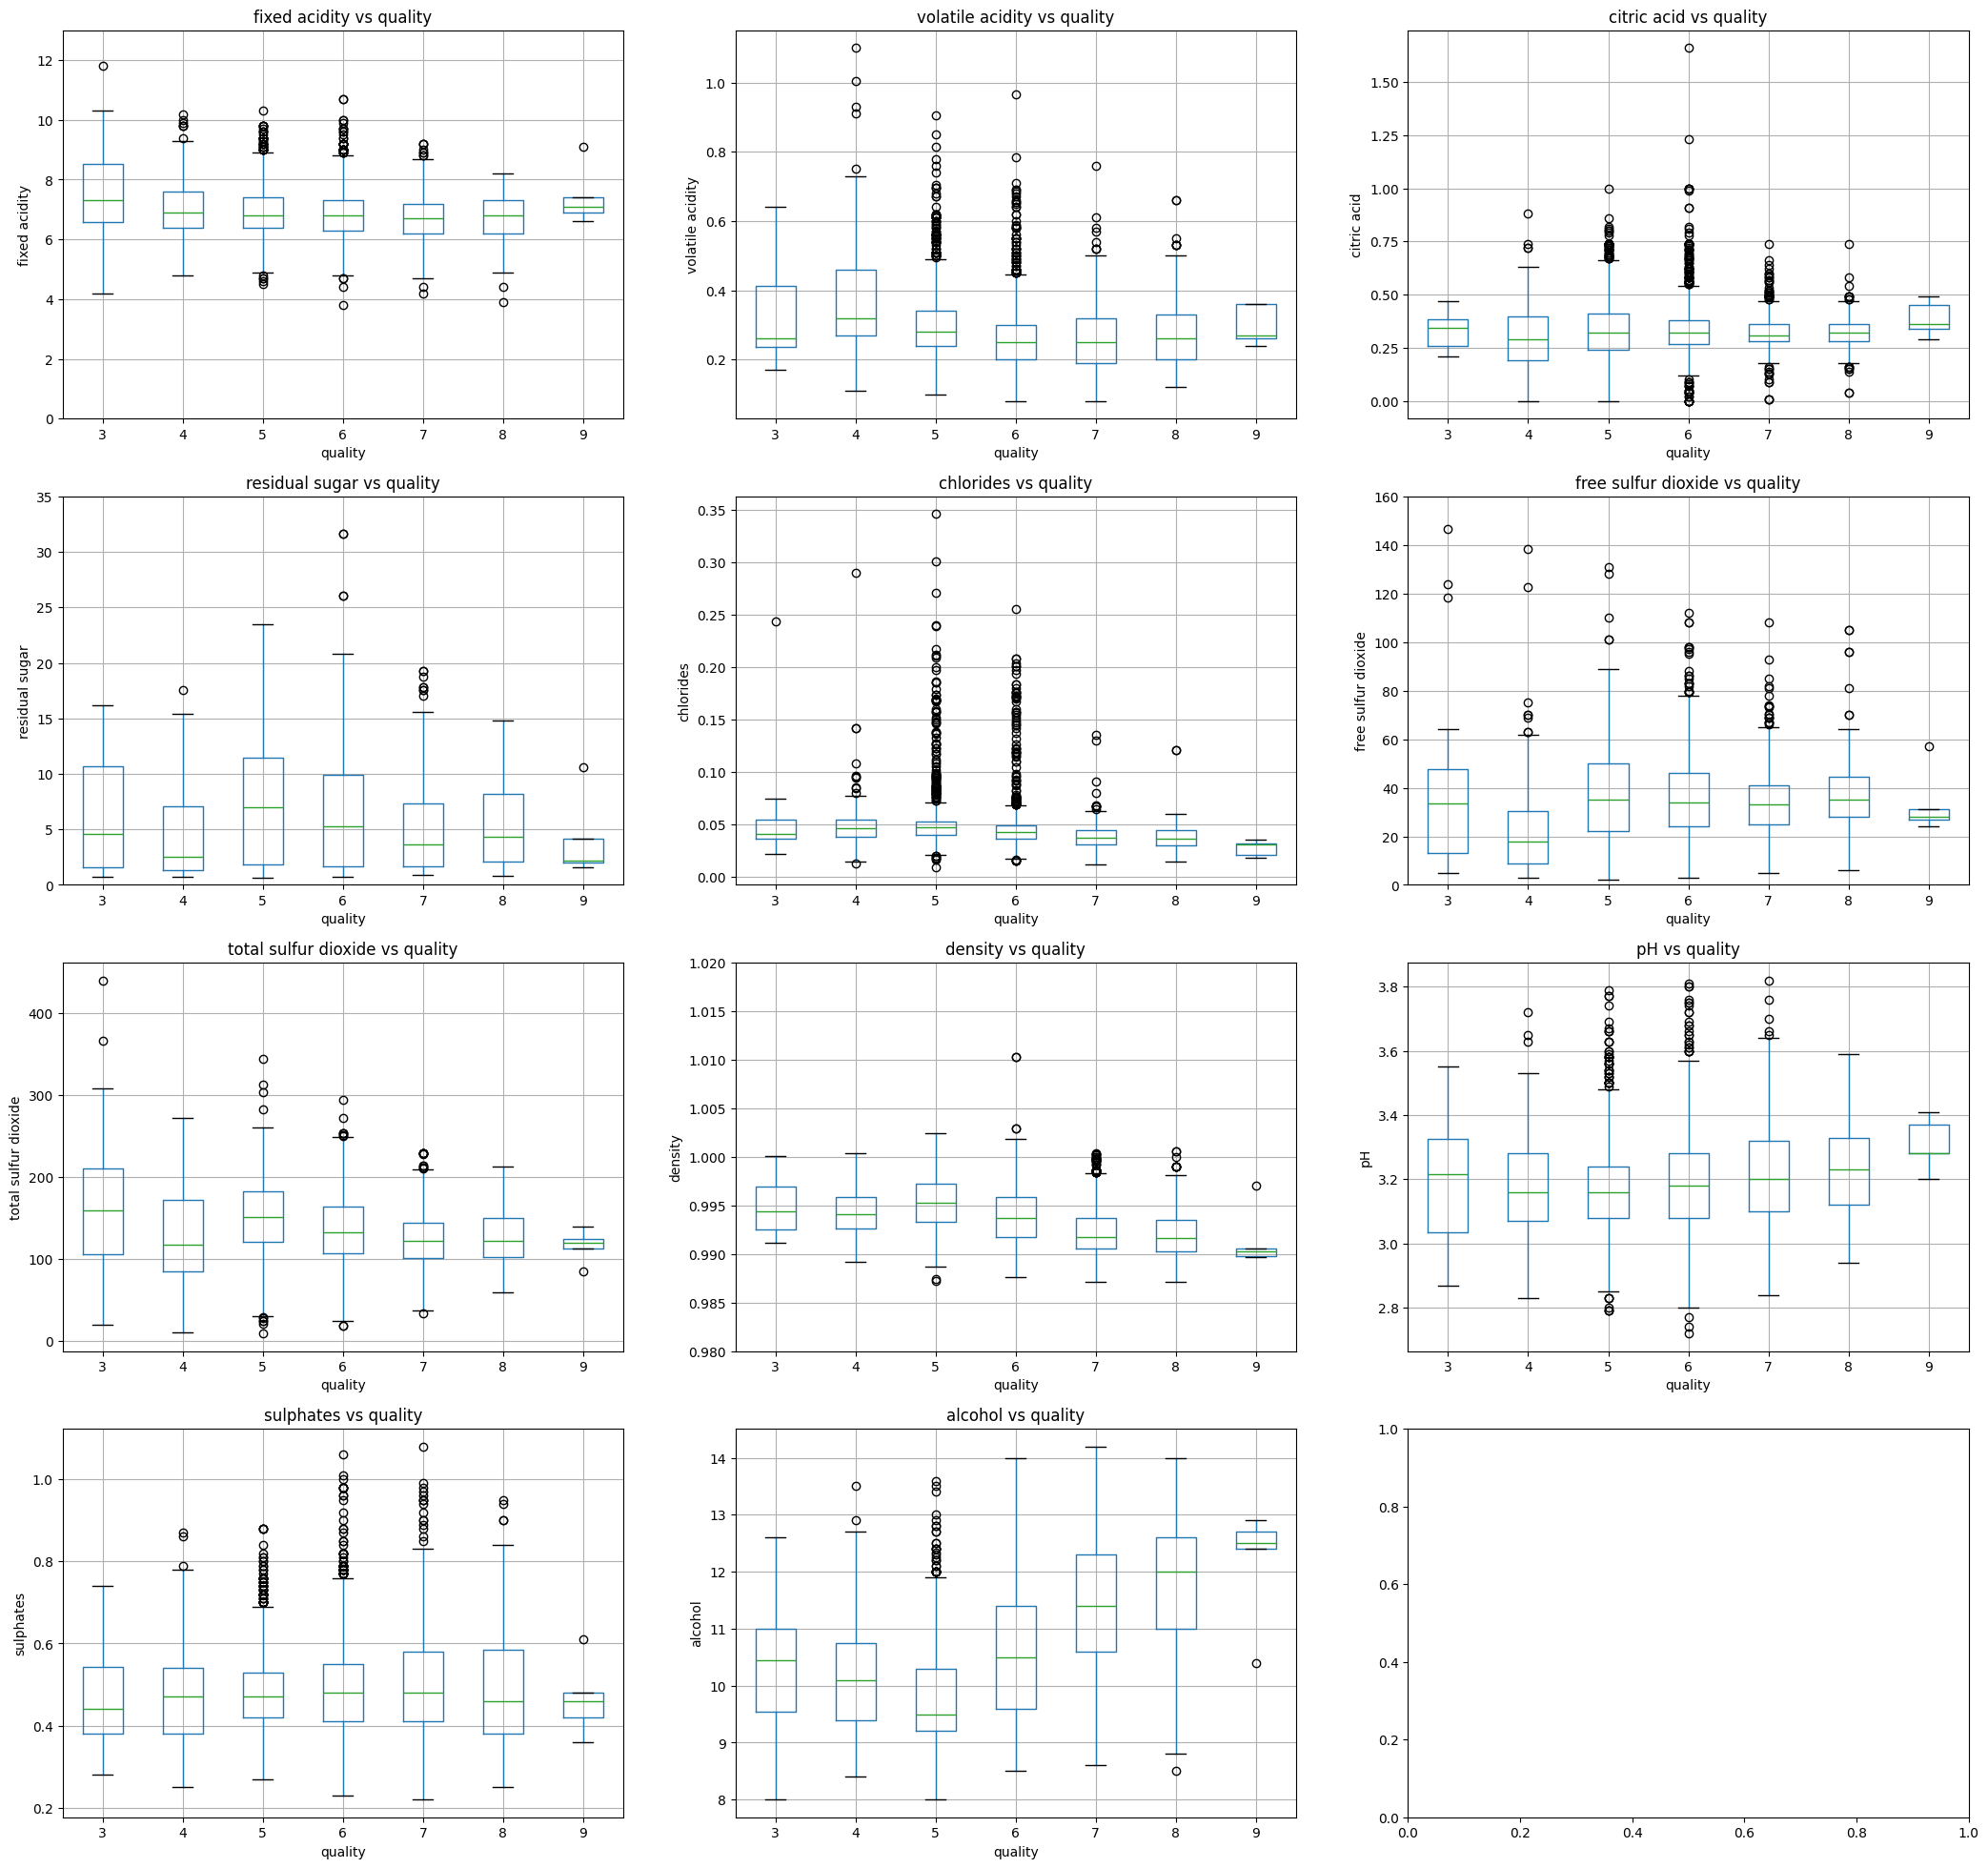

In [15]:
# YOUR CODE HERE

#grabbing quality wine series and storing it in the value X
X = wine_data["quality"]

#function used to plot box plots
def box_plot(ax, x, y, *, title=None, ylabel=None, ylim=None):
    df = pd.DataFrame({"x": x, "y": y})
    df.boxplot(column='y', by='x', ax=ax)
    ax.set_xlabel("quality")
    if title is not None:
        ax.set_title(title)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.figure.suptitle("")

#creating a figure and subplots for all cols and mapping them to their respective axes
fig, axes = plt.subplots(4,3, figsize=(25,25))
in_out_axes = axes.flatten()
map_to_in_out_axes = {col: ax for col, ax in zip(wine_data.drop(columns=["quality"], axis=1).columns, in_out_axes)}

#actually plotting graphs
for col in wine_data.drop(columns=["quality"]).columns:
    box_plot(map_to_in_out_axes[col], X, wine_data[col], title= f"{col} vs quality", ylabel=col)

#fixing ylims on certain graphs to exclude outliers that make the graphs hard to read (max samples excluded 1)
map_to_in_out_axes["fixed acidity"].set_ylim(0,13)
map_to_in_out_axes["residual sugar"].set_ylim(0,35)
map_to_in_out_axes["free sulfur dioxide"].set_ylim(0,160)
map_to_in_out_axes["density"].set_ylim(0.98,1.02)

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [16]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [17]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [18]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [19]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [20]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [21]:
wine_data.query("density > 1.02")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [22]:
outlier_density = wine_data.loc[2781, "density"]
density_mean = wine_data["density"].mean()
density_std = wine_data["density"].std()

zscore = (outlier_density - density_mean) / density_std
zscore

np.float64(15.029763469149108)

Text(0, 0.5, 'density (g/L)')

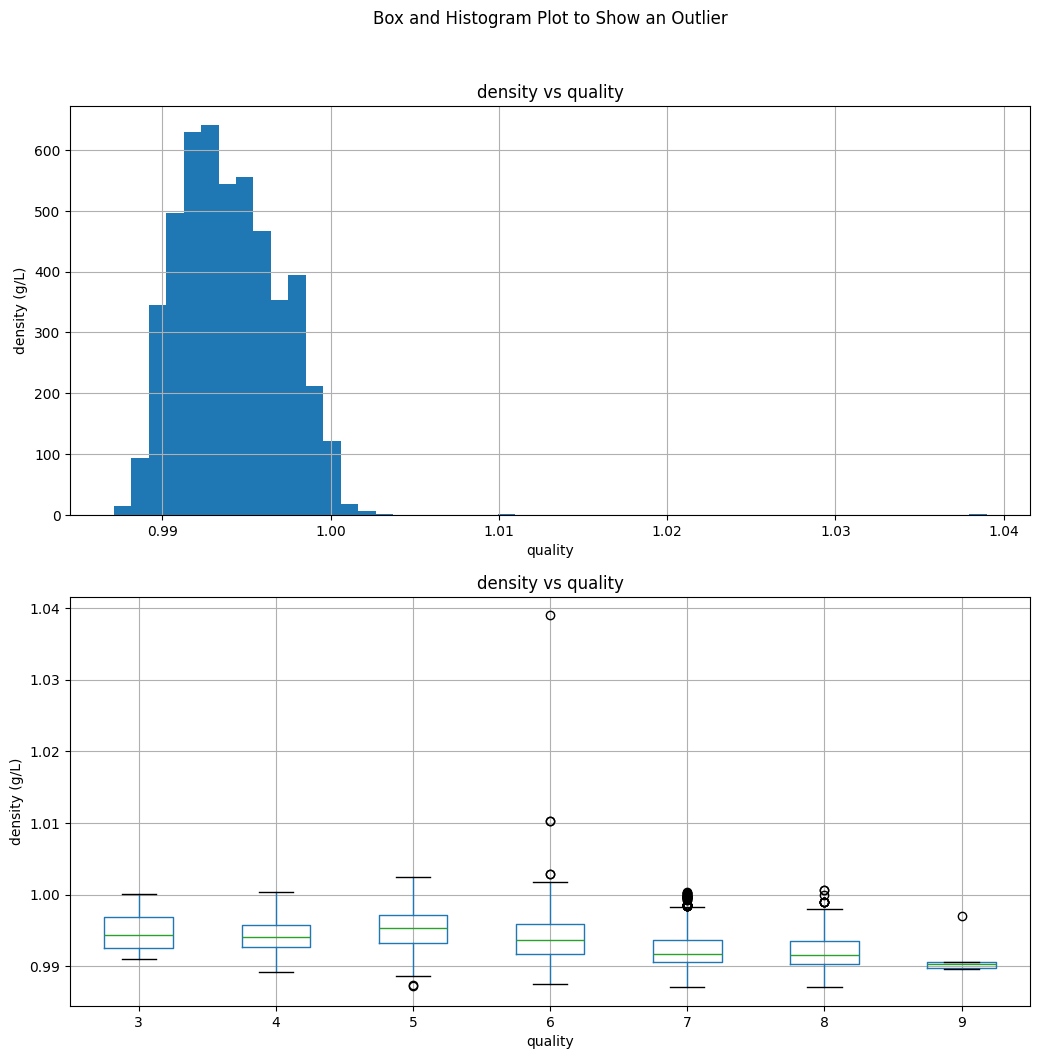

In [23]:
# YOUR CODE HERE

outlier_data = wine_data["density"]
df2 = pd.DataFrame({"x": wine_data["quality"], "y":outlier_data })

fig, ax = plt.subplots(2,1, figsize=(12,12))

ax[0].hist(outlier_data, bins=50)
ax[0].set_title("density vs quality")
ax[0].set_xlabel("quality")
ax[0].set_ylabel("density (g/L)")
ax[0].grid(True)

df2.boxplot(column='y', by='x', ax=ax[1])
ax[1].figure.suptitle("Box and Histogram Plot to Show an Outlier")
ax[1].set_title("density vs quality")
ax[1].set_xlabel("quality")
ax[1].set_ylabel("density (g/L)")

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE